# Pattern Recognition And Machine Learning
---

##  Assignment 3


Group No: 43
Group Members:
- Ajul Thomas (u3253992)
- Hamad Rasheed (u3224704)

# Heart Disease Prediction using Pattern Recognition and Machine Learning
---

## Data set selection and description of dataset and features.

## Description

Our project focuses on developing a Predictive Risk Model for Heart Disease (PRMHD) using Pattern
Recognition and Machine Learning (PRML). The model aims to analyze a range of medical and
lifestyle factors to predict the likelihood of an individual developing heart disease.



## Motivation
Heart disease is a leading cause of death worldwide. Early diagnosis can lead to effective treatment,
but traditional diagnostic methods are often slow and expensive. A computational model can provide
quick, accurate, and cost-effective risk assessment.


## Dataset

The Cleveland Heart Disease dataset from the UCI Machine Learning Repository was selected for this
project. Although the database contains a total of 76 attributes, our focus is on a subset of 14 key
attributes, as these are the ones most commonly cited in published research. Specifically, we are
utilizing only the Cleveland database for this endeavor. The initial steps involve data cleaning to
address any missing values, followed by Exploratory Data Analysis (EDA) to gain insights into dataset.

## Dataset Description:

1) **age** - age of the individual in years
2) **sex** - 1 = Male , 2 = Female
3) **cp**  - chest pain type
   - 1 - typical angina
   - 2 - atypical angina
   - 3 - non-anginal pain
   - 4 - asymptomatic
4) **trtbps** - resting blood pressure (in mm Hg on admission to the hospital)
5) **chol** - serum cholesterols in mg/dl
6) **fbs** - fasting blood sugar > 120 mg/dl
   - 1 - true
   - 0 - false
7) **restecg** - resting electrocardiographic results
   - 0 - normal
   - 1 - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria
8) **thalach** - maximum heart rate achieved
9) **exng**: exercise induced angina
    - 1 - Yes
    - 0 - No
10) **oldpeak** - ST depression induced by exercise relative to rest
11) **slp** - the slope of the peak exercise ST segmen
    - 1 - Upsloping
    - 2 - Flat
    - 3 - Downsloping
12) **ca** - number of major vessels (0–3) colored by fluoroscopy
13) **thall** - 3 = normal; 6 = fixed defect; 7 = reversible defect
14) **target** : 0= less chance of heart attack 1= more chance of heart attack

### Import required libraries

In [779]:
import pandas as pd
import numpy as np


### Import the Heart Disease Dataset

In [780]:
data = pd.read_csv('./data/heart.csv')
# data = pd.read_csv('./data/processed.cleveland.data')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis
---

EDA involves understanding the dataset's structure and basic statistics.

In [781]:
data.shape

(303, 14)

In [782]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'ca', 'thall', 'output'],
      dtype='object')

In [783]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
ca            int64
thall         int64
output        int64
dtype: object

In [784]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [785]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [786]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'ca', 'thall']

#### Observation

The dataset comprises a total of 303 records, which consist of 6 categorical, 7 numerical, and the target variable.

## Data Cleaning
---

Checks and addresses if any misssing values are there. If any will address these issues.

In [787]:
data[categorical_features].nunique()

sex        2
cp         4
fbs        2
restecg    3
exng       2
slp        3
ca         5
thall      4
dtype: int64

The categorical features in the dataset align with the expected values, adhering to the data set description. For example, the "sex" column contains only two distinct values, and all categorical variables have been correctly encoded.

In [788]:
data.duplicated().sum()

1

In [789]:
data = data.drop_duplicates()
data.duplicated().sum()

0

A single duplicate row has been successfully removed from the dataset.

In [790]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
ca          0
thall       0
output      0
dtype: int64

The dataset is free of any null or missing values.

In [791]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


## Data Visualization
---

Create visualizations to gain insights into the data distribution, relationships, and patterns. Uses libraries like Matplotlib and Seaborn.

In [792]:
import matplotlib.pyplot as plt
import seaborn as sns

changing the data for better visualization and plotting

In [793]:
df = data.copy(deep=True)
df['output'] = df.output.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exng'] = df.exng.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slp'] = df.slp.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thall'] = df.thall.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [794]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thall,output
0,63,Male,asymtomatic,145,233,True,0,150,No,2.3,upsloping,0,fixed_defect,Disease
1,37,Male,non-anginal pain,130,250,False,1,187,No,3.5,upsloping,0,reversable_defect,Disease
2,41,Female,atypical_angina,130,204,False,0,172,No,1.4,downsloping,0,reversable_defect,Disease
3,56,Male,atypical_angina,120,236,False,1,178,No,0.8,downsloping,0,reversable_defect,Disease
4,57,Female,typical_angina,120,354,False,1,163,Yes,0.6,downsloping,0,reversable_defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,typical_angina,140,241,False,1,123,Yes,0.2,flat,0,normal,No_disease
299,45,Male,asymtomatic,110,264,False,1,132,No,1.2,flat,0,normal,No_disease
300,68,Male,typical_angina,144,193,True,1,141,No,3.4,flat,2,normal,No_disease
301,57,Male,typical_angina,130,131,False,1,115,Yes,1.2,flat,1,normal,No_disease


### Target Variable Distribution



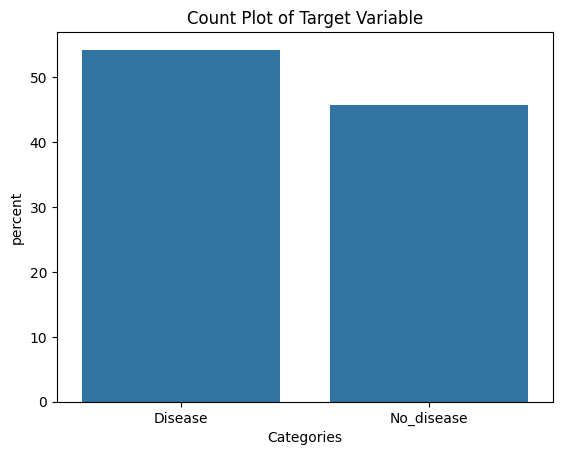

In [795]:
sns.countplot(df, x='output', stat="percent")
plt.title('Count Plot of Target Variable')
plt.xlabel('Categories')
plt.show()

#### Observation:

- Our initial graph categorizes individuals based on the presence or absence of heart disease. In the dataset, just over 50% of participants have heart disease, while approximately 45% do not. This balanced distribution provides a solid foundation for more in-depth analysis.

### Distribution of Numerical Variables

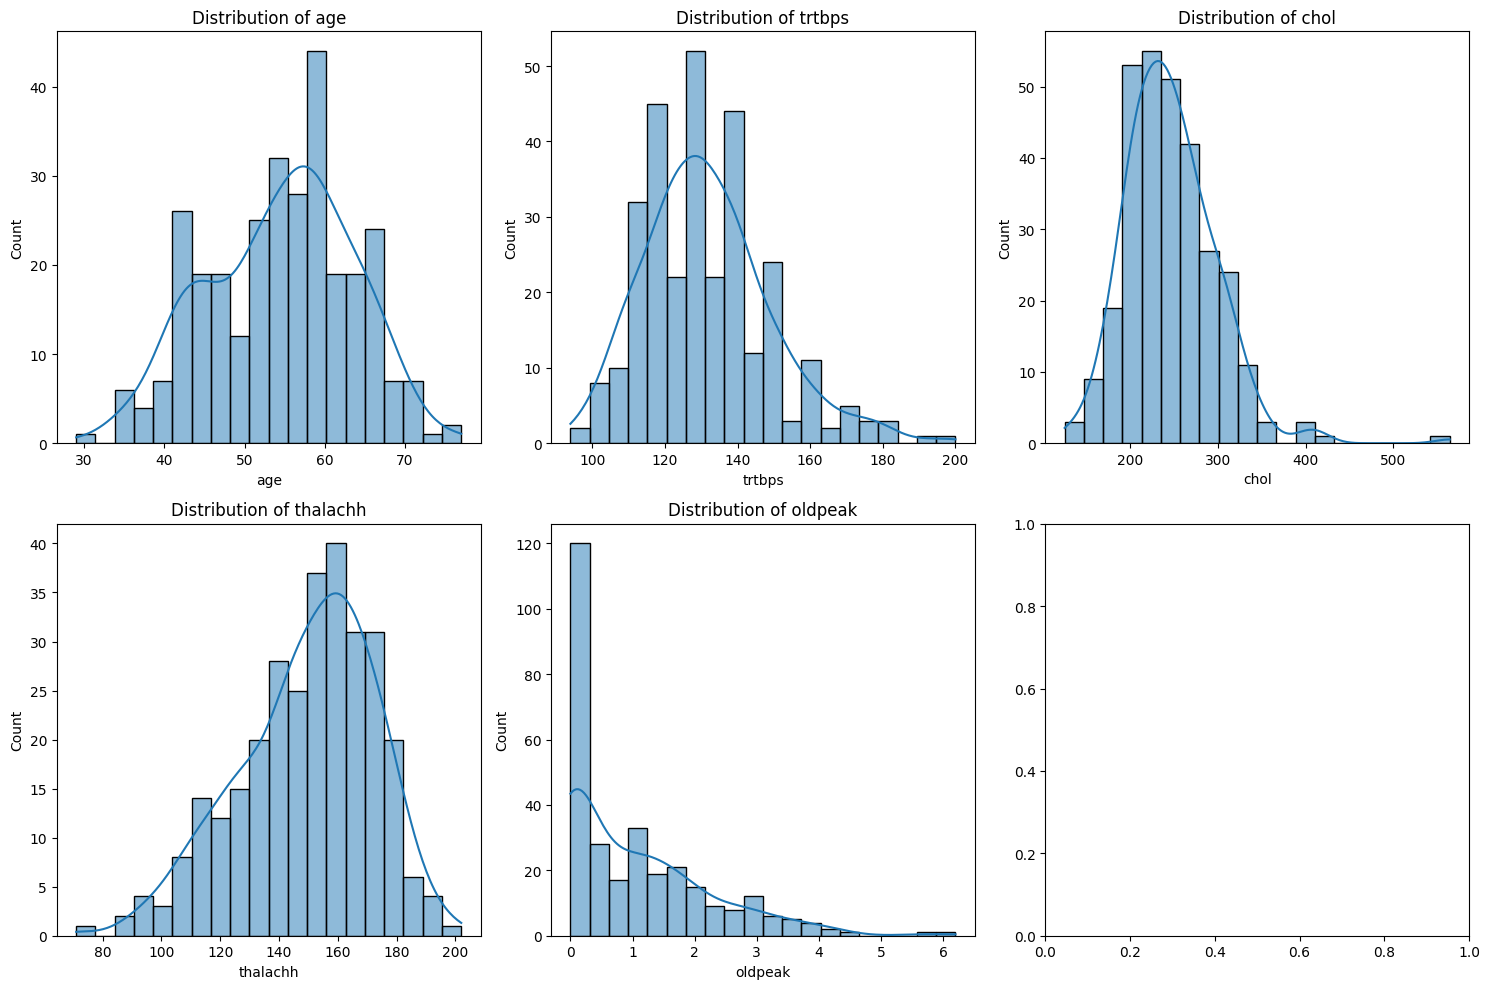

In [796]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    sns.histplot(data[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


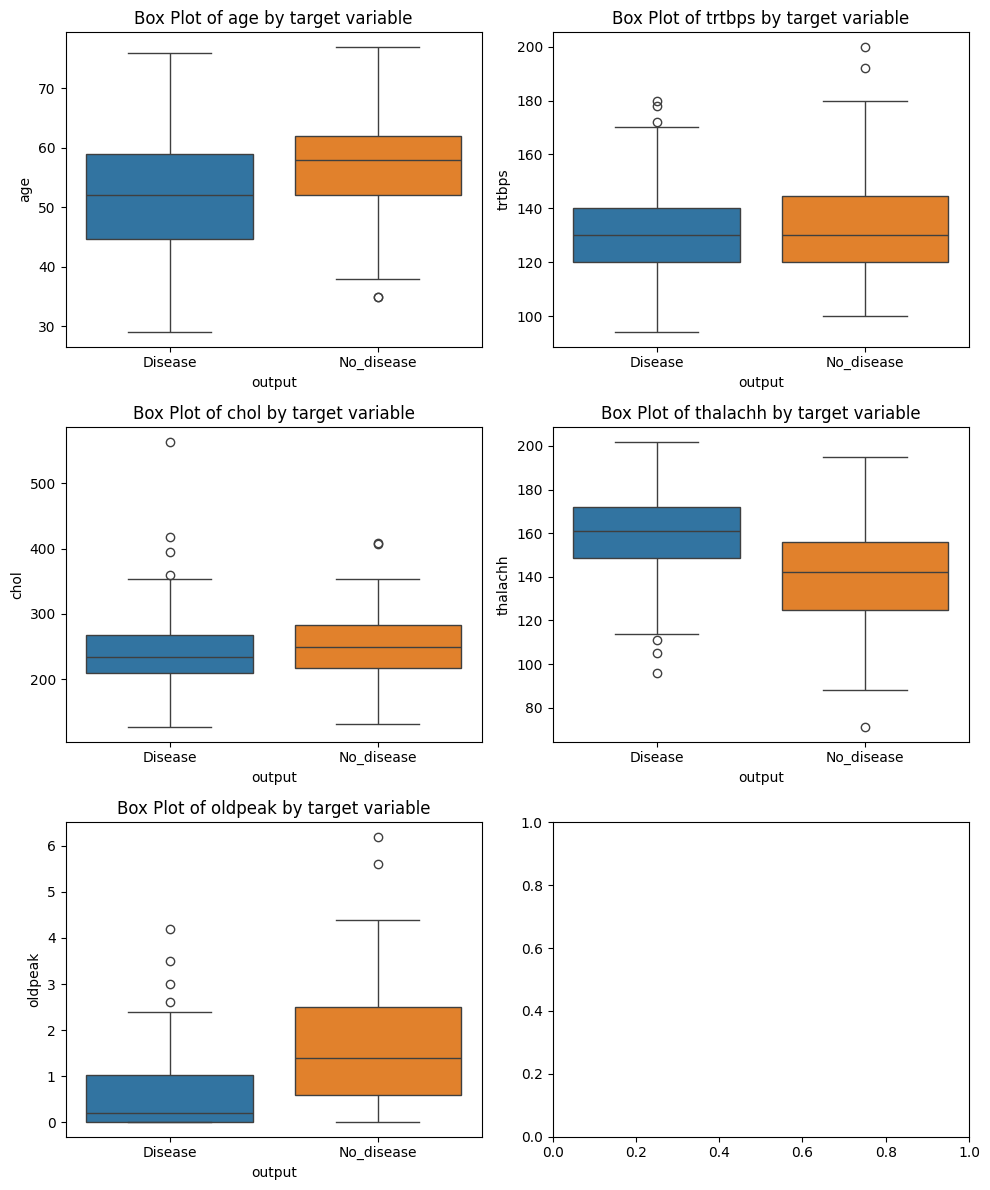

In [797]:
# Assuming 'target' is the name of the column representing your target variable
target_variable = 'output'

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
fig.subplots_adjust(hspace=0.5)

colors = ["blue", "green"]

# Loop through each attribute and plot a box plot for each target variable
for i, attribute in enumerate(numerical_features):
    row, col = i//2, i % 2
    ax = axes[row, col]
    # plt.figure(figsize=(10, 6))  # Set the figure size
    sns.boxplot(x=target_variable, y=attribute, hue=target_variable, data=df, ax=ax)
    ax.set_title(f'Box Plot of {attribute} by target variable')
    ax.set_xlabel(target_variable)
    ax.set_ylabel(attribute)

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations:

As we examine the distributions of numerical variables such as age, resting heart rate (trtbps), cholesterol (chol), maximum heart rate achieved (thalachh), and exercise-induced ST depression (oldpeak).

The dataset reveals that the average age for those with heart disease is lower compared to those without it. Most individuals in the dataset are aged between 50 and 70, following a normal distribution.

In terms of cholesterol levels, there's little variation between those with and without heart disease, although some outliers are present. The majority of individuals have cholesterol levels ranging between 200 and 300, adhering to a normal distribution.

When considering maximum heart rate achieved, people with heart disease generally have higher rates than those without. Several outliers exist, but the majority have heart rates between 150 and 175.

Lastly, the average oldpeak level for those with heart disease is lower than for those without. Despite some outliers, the distribution for oldpeak is right-skewed, with most individuals registering a value of zero.

### Distribution of Categorical Variables

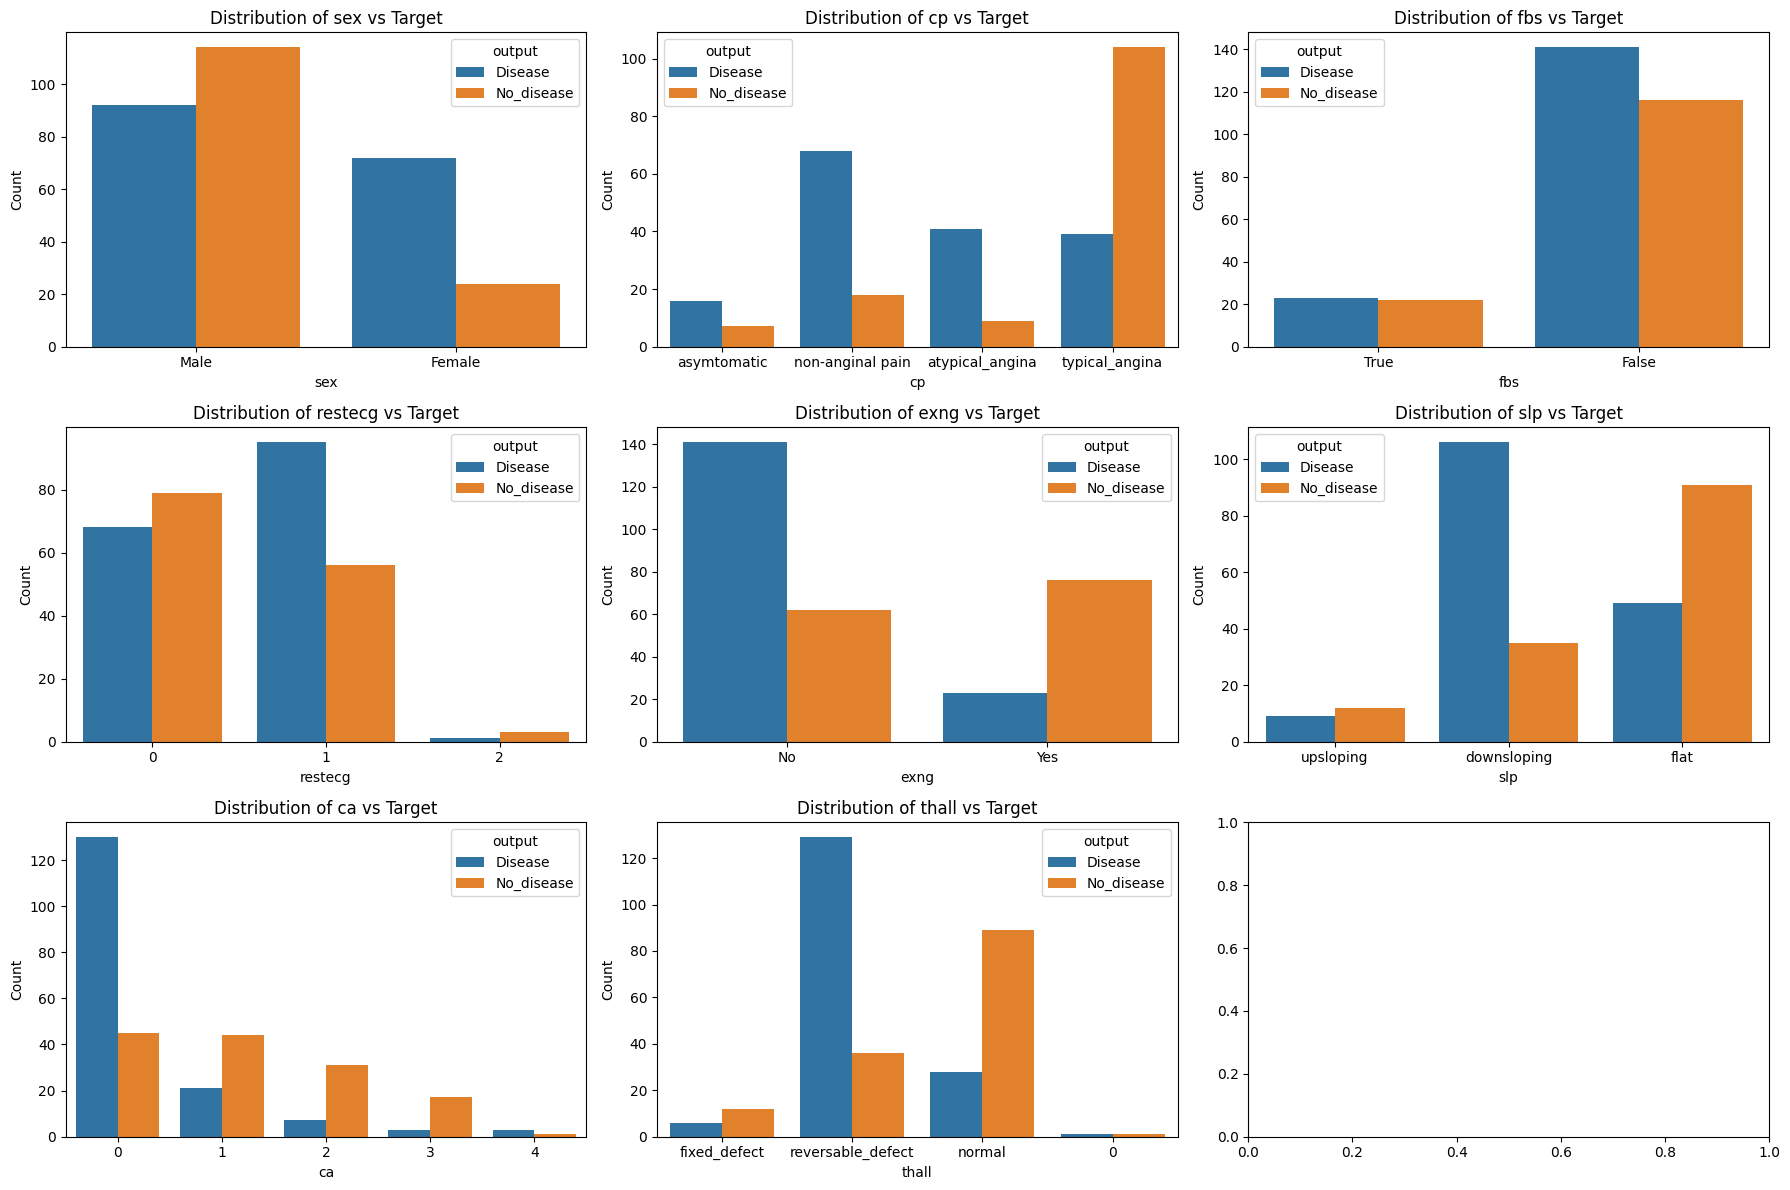

In [798]:
# Create bar plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'ca', 'thall']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    sns.countplot(x=df[feature], hue=df['output'], ax=ax)
    ax.set_title(f'Distribution of {feature} vs Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


###  Gender distribution according to target variable

C:\Users\ajult\AppData\Local\Temp\ipykernel_34632\3742478429.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (name, rotation = 0)


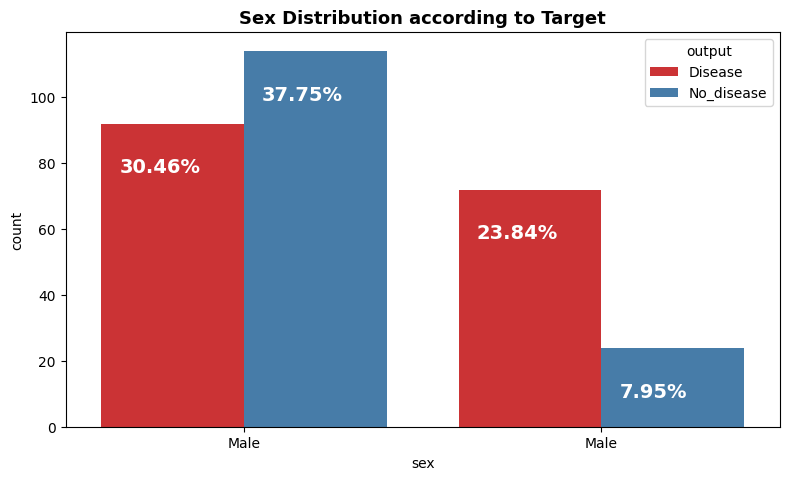

In [799]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['sex']
ax = sns.countplot(x='sex', hue='output', data=df, palette='Set1')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

plt.tight_layout()

#### Chest pain distribution according to target variable

In [800]:
df.cp.value_counts()

cp
typical_angina      143
non-anginal pain     86
atypical_angina      50
asymtomatic          23
Name: count, dtype: int64

C:\Users\ajult\AppData\Local\Temp\ipykernel_34632\815883350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (name, rotation = 0)


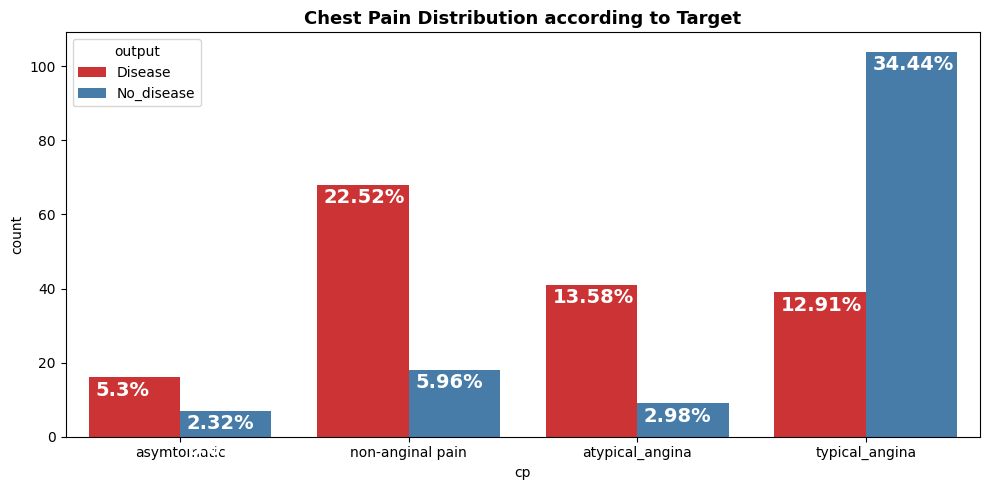

In [801]:
fig, ax = plt.subplots(figsize=(10,5))
name = df.cp.unique()
ax = sns.countplot(x='cp', hue='output', data=df, palette='Set1')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

#### Fasting blood sugar distribution according to target variable

C:\Users\ajult\AppData\Local\Temp\ipykernel_34632\2214451207.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (name, rotation = 0)


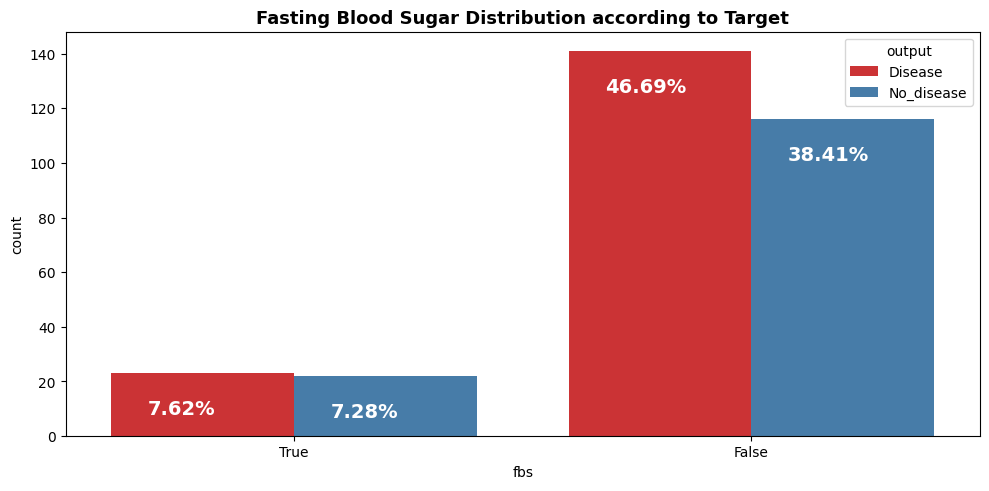

In [802]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['fbs']
ax = sns.countplot(x='fbs', hue='output', data=df, palette='Set1')
ax.set_title("Fasting Blood Sugar Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

#### Observations on distribution of Categorical Variables vs Target:

Sex vs. Target: The data indicates that a higher number of women have heart disease compared to those who don't, while the opposite is true for men. Men make up 68.3% of the study population.

Chest Pain (cp) vs. Target: Among the four levels of chest pain, individuals at level 2 are more prone to heart disease. Conversely, those at level 0 are less likely to have heart disease and make up 47.2% of the dataset.

Fasting Blood Sugar (fbs) vs. Target: Individuals with an fbs under 120 are more susceptible to heart disease and constitute 85.1% of the dataset.

Resting ECG (restecg) vs. Target: Those with a restecg result of 1 are more likely to have heart disease compared to those with a result of 0. The majority have results categorized as 0 or 1.

Exercise-Induced Angina (exang) vs. Target: Individuals without exercise-induced angina are more likely to have heart disease. This group represents 67.3% of the study population.

Slope of Peak Exercise ST Segment vs. Target: Those with a downslope are more susceptible to heart disease. Most individuals display either a flat or downslope.

Number of Major Vessels Colored by Fluoroscopy (CA) vs. Target: Participants with zero major vessels colored are more prone to heart disease, making up 57.8% of the dataset.

Thallium Stress Result (thal) vs. Target: Individuals with a thal value of 2 are more likely to have heart disease, and they constitute 54.8% of the study population.

### Visualize the distribution of continuous variable across target variable

C:\Users\ajult\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


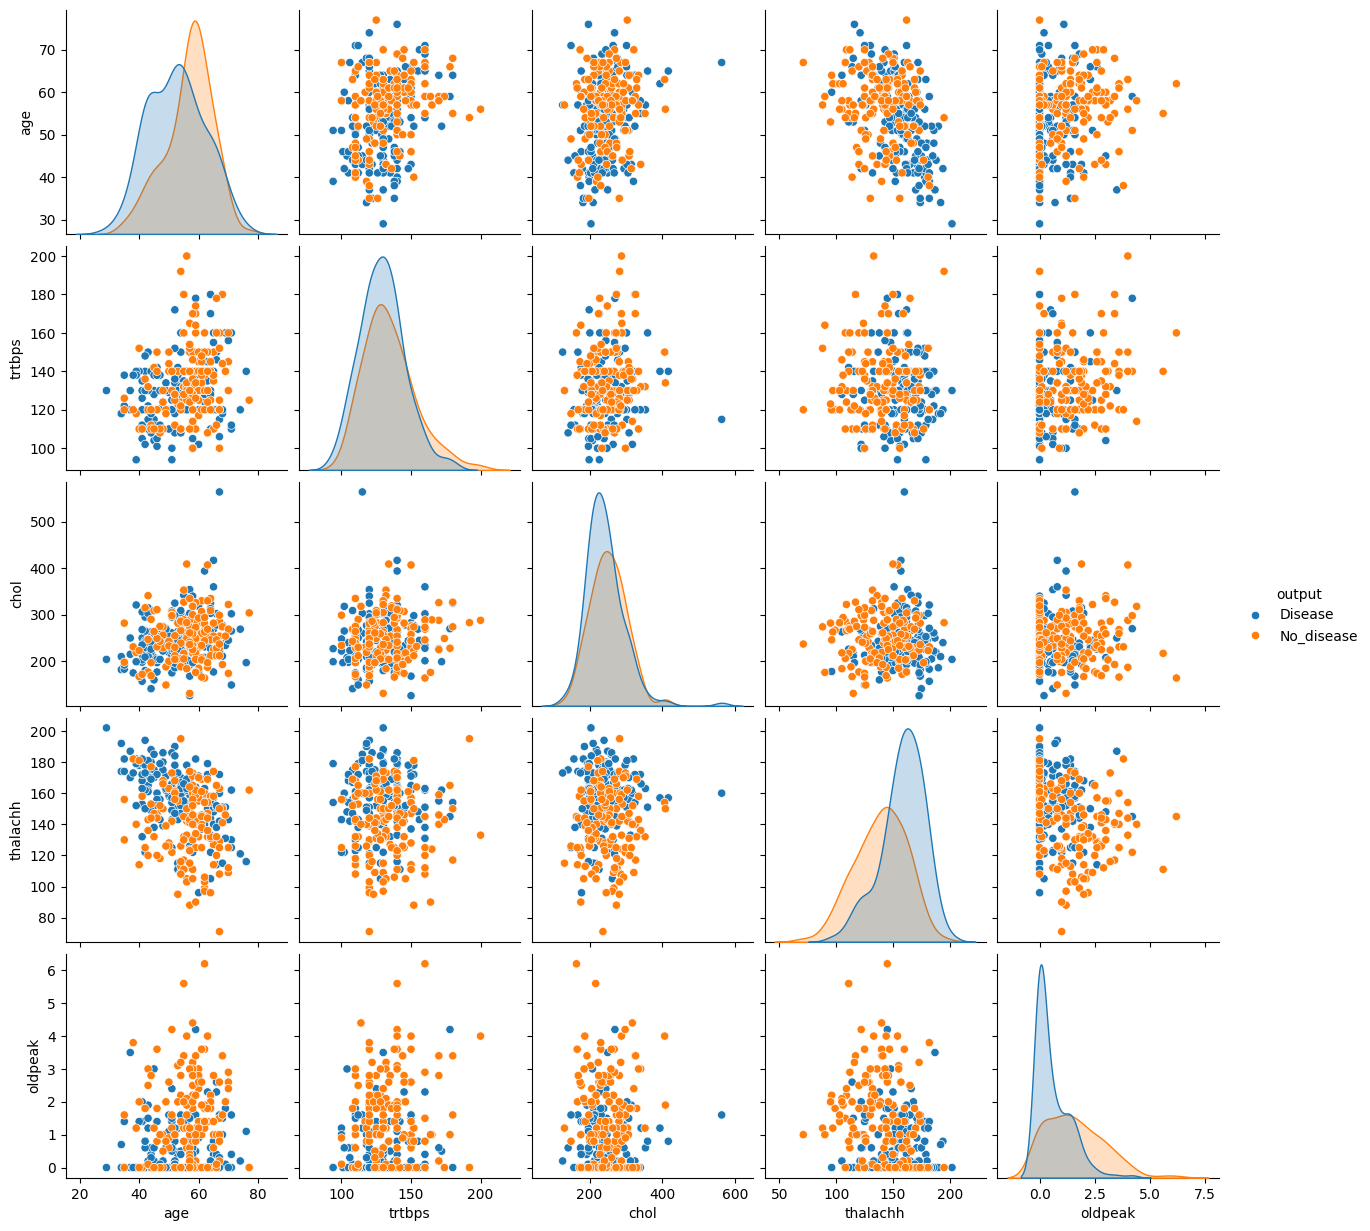

In [803]:
sns.pairplot(df[numerical_features + ['output']], hue='output')

#### Observation:

A pair plot comparing heart disease to non-heart disease across numerical variables offers a comprehensive overview of the dataset, highlighting patterns and correlations among different metrics for both categories.

Age: The average age for individuals with heart disease is lower than for those without, suggesting age could inversely correlate with risk. The age distribution is mostly normal, centered around 50 to 70 years.

Resting Heart Rate (trtbps) & Cholesterol (chol): These variables show little variation between the heart disease and non-heart disease groups, indicating they may not be strong predictors. Outliers in these variables warrant further investigation.

Maximum Heart Rate Achieved (thalachh): Individuals with heart disease generally achieve higher maximum heart rates, which could be an important variable for predictive modeling.

ST Depression Induced by Exercise Relative to Rest (oldpeak): A lower average oldpeak is observed among individuals with heart disease, potentially pointing to different stress responses between the two groups.

The pair plot serves as a valuable tool for visualizing interactions among these variables within the context of heart disease and non-heart disease categories

# Correlation Matrix
-----------

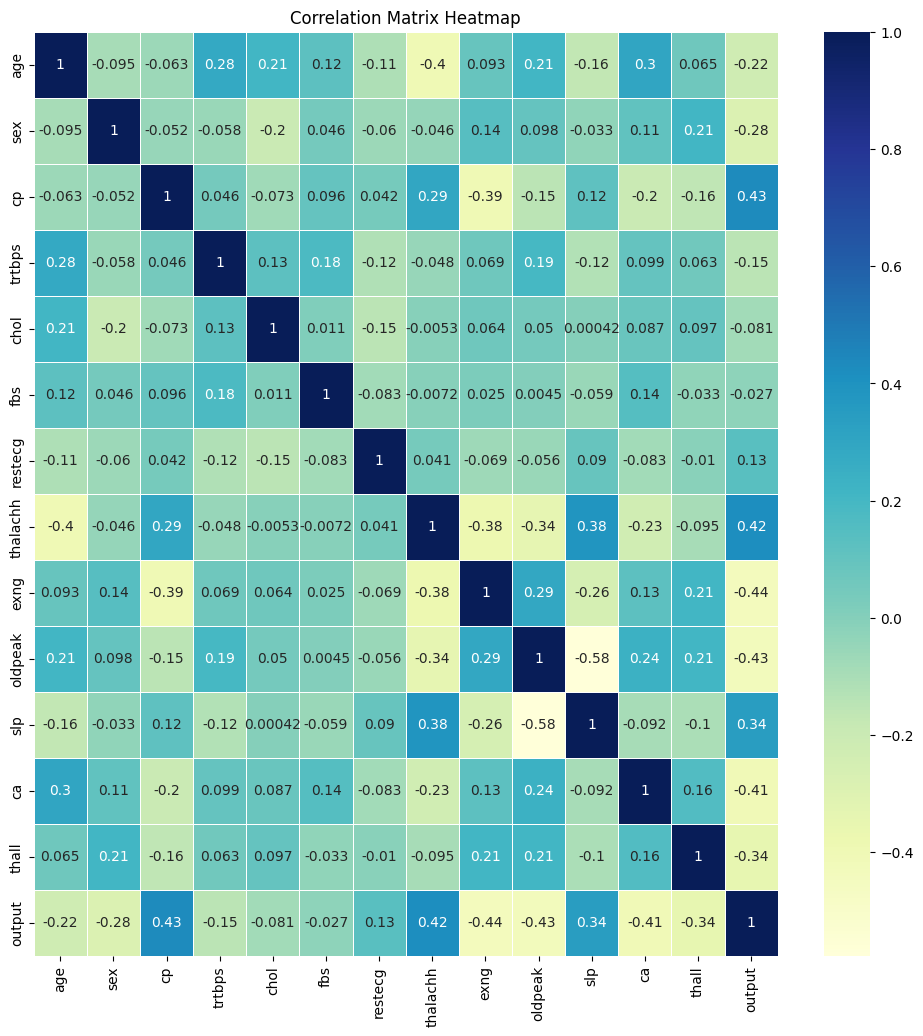

In [804]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 12), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Observations:

Lowest Correlation: Fasting Blood Sugar (fbs) and Cholesterol (chol) show the lowest correlation with the target variable. This aligns with earlier observations that these variables exhibited little variation between individuals with and without heart disease, suggesting they may not be strong predictors.

General Correlations: Most other variables are correlated with each other and with the target variable. For instance, age has an inverse correlation with the likelihood of having heart disease, while maximum heart rate achieved (thalachh) tends to be higher in individuals with heart disease.

The correlation matrix can serve as a statistical foundation for more in-depth analysis, helping to identify key variables that could be central to predictive modeling for heart disease.

## Preprocessing Data
--------


Since the data obtained from Kaggle has already undergone preprocessing, including the encoding of categorical variables into numerical values, no additional preprocessing steps are necessary. However, we will tailor scaling and dimensionality reduction techniques to suit the specific algorithms we plan to implement.

In [805]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [806]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [807]:
print(data.shape)

# features
X = data.iloc[:, 0:-1]

# target variable
y = data.iloc[:, -1]

X.head()

(302, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Splitting Data into training and testing Data
---

The 80-20 test-train split is a common and well-balanced choice for dividing the Cleveland Heart Disease dataset for our machine learning project. This split reserves 80% of the data for training our models, allowing them to learn patterns and relationships, while the remaining 20% serves as a test set to assess their performance. This approach helps evaluate how well our models generalize to unseen data, providing a reliable indication of their predictive capabilities. It's essential to strike a balance between the training and testing subsets to avoid overfitting or underfitting, ensuring the robustness and accuracy of our machine learning models for heart disease prediction.


In [808]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

### Normalising Data for Distance based Algorithms

---

Scaling variables using techniques like Min-Max scaling or normalization is a critical preprocessing step in machine learning. It transforms the features within a consistent range, typically between 0 and 1, ensuring that no single variable dominates the learning process due to its larger scale. This normalization enhances the stability and convergence of many machine learning algorithms, allowing them to effectively learn from diverse datasets. It's especially important when features have different units or scales, ensuring fair treatment of all variables in the modeling process. Min-Max scaling is particularly useful for algorithms sensitive to the magnitude of input features, such as neural networks or support vector machines, as it promotes fair and consistent feature contributions, ultimately improving model performance.


In [809]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# instantiating min-max scaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

# fits scaler to data and transforms the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# prints the data sample
X_norm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [810]:
# split data into training and testing sets
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.20, random_state=17)

#### Dimensionality Reduction
----

PCA is a valuable technique for dimensionality reduction that can benefit a wide range of machine learning algorithms. It helps make data more manageable, reduces the risk of overfitting, and often leads to more efficient and interpretable models. However, it's important to choose the right number of principal components carefully, as overly aggressive dimensionality reduction can lead to information loss.

In [811]:
from sklearn.decomposition import PCA
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# Assuming X_normalized is your normalized dataset
# Apply PCA with 95% variance retained
n_components = 0.97

pca = PCA(n_components=n_components)

# 
pca.fit(X_norm)

#
X_pca = pd.DataFrame(pca.transform(X_norm))

# You can access explained variance by each component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27124984, 0.18727668, 0.12575283, 0.09004131, 0.08313976,
       0.06175985, 0.05433045, 0.0340782 , 0.02994939, 0.02224589,
       0.01600916])

In [812]:
# Now, X_pca contains the dataset with reduced dimensions
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.178716,-0.469027,1.133835,0.538033,0.403117,-0.038791,-0.360758,0.337361,-0.113694,0.061322,0.002598
1,-0.133963,-0.389906,-0.007203,0.727368,0.397921,0.367791,-0.290477,-0.008665,0.334287,0.292264,-0.080685
2,-0.663677,0.424063,-0.166359,-0.145191,-0.049195,-0.275486,-0.209186,-0.069865,0.192922,0.122867,-0.233634
3,-0.278903,-0.442452,-0.297264,-0.163748,-0.036653,0.172767,-0.035657,0.054015,-0.112513,0.049828,-0.054399
4,0.178209,0.885631,-0.302188,-0.554388,0.121272,0.106463,0.004954,0.022871,-0.061521,0.020211,-0.014531


In [813]:
# split data into training and testing sets
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.20, random_state=17)

## Spot Checking Algorithms with accuracy report
---

LR: 0.829667 (0.066114)
LDA: 0.821500 (0.077077)
KNN: 0.643333 (0.078422)
CART: 0.693000 (0.123679)
GauNB: 0.813333 (0.072572)
SVM: 0.833833 (0.049744)
RFC: 0.817333 (0.050262)
XGBC: 0.821333 (0.042543)
NB: 0.742667 (0.096598)
------------------------


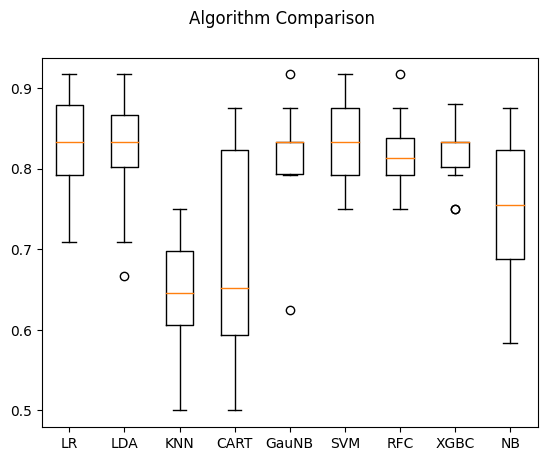

In [814]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

seed = 7

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GauNB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear')))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGBC', XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8)))
models.append(('NB', MultinomialNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

print('------------------------')
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


#### Observations from algorithm spot checking

When choosing algorithms for a heart disease prediction model based on mean accuracy results, we want to select models with the highest mean accuracy. However, it's essential to consider not only the mean accuracy but also the variation (standard deviation) in the accuracy values. Models with lower variation are generally more stable and reliable.

Based on the mean accuracy and standard deviation, here are our observations:

**LR (Logistic Regression):** Mean Accuracy = 0.829667, Standard Deviation = 0.066114
Reasonable mean accuracy with moderate variation. Consider this model.

**LDA (Linear Discriminant Analysis):** Mean Accuracy = 0.821500, Standard Deviation = 0.077077
Similar mean accuracy to LR but slightly higher variation. Still a reasonable choice.

**GauNB (Gaussian Naive Bayes):** Mean Accuracy = 0.813333, Standard Deviation = 0.072572
Good mean accuracy with moderate variation. Worth considering.

**SVM (Support Vector Machine):** Mean Accuracy = 0.833833, Standard Deviation = 0.049744
The highest mean accuracy with relatively low variation. This model appears promising and should be strongly considered.

**RFC (Random Forest Classifier):** Mean Accuracy = 0.813167, Standard Deviation = 0.065462
Good mean accuracy, and the variation is reasonable. It's a solid choice.

**XGBC (XGBoost Classifier):** Mean Accuracy = 0.821333, Standard Deviation = 0.042543
Good mean accuracy with low variation. XGBoost is known for its strong performance.

**KNN (K-Nearest Neighbors):** Mean Accuracy = 0.643333, Standard Deviation = 0.078422
Lowest mean accuracy with high variation. It might not be the best choice in this case.

**CART (Decision Tree Classifier):** Mean Accuracy = 0.705500, Standard Deviation = 0.112126
Moderate mean accuracy, but high variation.

**NB (Naive Bayes):** Mean Accuracy = 0.742667, Standard Deviation = 0.096598
Reasonable mean accuracy, but the variation is relatively high.

Based on these results, we are focusing on the following models:

- SVM (Support Vector Machine)
- LR (Logistic Regression)
- RFC (Random Forest Classifier)

We would also like to check on the following algorithms, if we have enough time to explore:

- LDA (Linear Discriminant Analysis)
- GauNB (Gaussian Naive Bayes)
- XGBC (XGBoost Classifier)


## Selecting PRML Algorithms


Selecting appropriate machine learning algorithms for a specific dataset involves considering factors like the nature of the data, the problem type, and the desired outcomes. In the case of heart disease dataset, which is a binary classification problem (predicting the presence or absence of heart disease), below mentioned algorithms can be suitable:

1. **Logistic Regression:**
   - Applicability: Binary classification problems.
   - Reasoning: Logistic Regression is a simple and interpretable algorithm that can serve as a baseline model. It works well when the relationship between features and the target variable is approximately linear. Gien your dataset has both numerical and categorical features, logistic regression can handle both types effectively.

2. **Random Forest:**
   - Applicability: Classification problems, especially with structured data.
   - Reasoning: Random Forest is an ensemble algorithm known for its ability to handle both numerical and categorical features. It is robust, provides feature importance scores, and often works well "out of the box." Random Forests are also less prone to overfitting and can handle noiet3var3able.

4. **Support Vector Machines (SVM):**
   - Applicability: Binary classification problems.
   - Reasoning: SVM is effective for binary classification tasks, even when the data is not linearly separable. It works well when there is a clear margin of separation between classes. SVM can handle both numericalical features.
s specific goals.


#### Reason for choosing the above algorithms

1) Data Type: Heart Disease dataset contains a mix of numerical and categorical features, which makes it suitable for algorithms like Random Forest, Gradient Boosting, and Logistic Regression that can handle both types of features effectively.

2) Binary Classification: Our task is binary classification (predicting the presence or absence of heart disease), making algorithms designed for classification tasks, like Logistic Regression, Random Forest, and Gradient Boosting, relevant.

3) Complexity:While Logistic Regression is simple and interpretable, Random Forest can capture more complex relationships in the data, which might be important for achieving high predictive accuracy.

4) Ensemble Methods: Random Forest and Gradient Boosting are both ensemble methods, which can help improve model performance by combining multiple weak learners.


In [815]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
# import the metrics class
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score

target_name = ['Healthy', 'Heart Disease']

### Hyperparameter tuning for Logistic Regression Model

Hyperparameter tuning for logistic regression is an essential step to optimize the performance of the model. Hyperparameters are parameters that are not learned from the data but are set prior to the model training. For logistic regression, some common hyperparameters that you can tune include:

**Regularization Strength (C):** The regularization parameter 'C' is a crucial hyperparameter for logistic regression. It controls the trade-off between fitting the training data and preventing overfitting. A smaller 'C' value increases the regularization strength, while a larger 'C' value reduces it.

**Penalty:** Logistic regression supports two types of penalties for regularization: L1 (Lasso) and L2 (Ridge). You can choose between them or a combination of both. L1 regularization helps with feature selection, while L2 regularization smooths the model weights.

**Solver:** Logistic regression can be solved using different algorithms (solvers), such as 'liblinear', 'lbfgs', 'newton-cg', 'sag', and 'saga.' The choice of solver can affect the convergence speed and performance of the model.

**Class Weight:** In imbalanced datasets, you can assign different weights to classes to address the class imbalance issue. The 'class_weight' hyperparameter allows you to specify these weights.

**Max Iterations:** The maximum number of iterations (max_iter) determines the number of iterations that the solver will perform to converge. You may need to adjust this value if the model is not converging.

In [816]:
# Define your parameter grid
param_grid_lr = {             # Regularization method
    'C': [1,5,8,10,15],    # Inverse of regularization strength (smaller values mean stronger regularization)
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
    # 'max_iter': [100, 200],      # Maximum number of iterations
}

# Create a GridSearchCV object to perform the grid search
gscv_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to your data
gscv_lr.fit(X_norm_train, y_norm_train)  # Replace X and y with your data

# Print the best hyperparameters
print("Best Hyperparameters: ", gscv_lr.best_params_)

# Print the best accuracy score
print(f"Best score: {gscv_lr.best_score_}")

# print best model
print(f"Best model: {gscv_lr.best_estimator_}")

# cross validation results
cv_results_lr = pd.DataFrame(gscv_lr.cv_results_)
cv_results_lr = cv_results_lr[['param_solver', 'param_C', 'mean_test_score']]
print(cv_results_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'C': 5, 'solver': 'liblinear'}
Best score: 0.8220238095238095
Best model: LogisticRegression(C=5, solver='liblinear')
  param_solver param_C  mean_test_score
0    liblinear       1         0.805527
1        lbfgs       1         0.801361
2    liblinear       5         0.822024
3        lbfgs       5         0.813690
4    liblinear       8         0.813690
5        lbfgs       8         0.809524
6    liblinear      10         0.813690
7        lbfgs      10         0.817772
8    liblinear      15         0.817772
9        lbfgs      15         0.817772


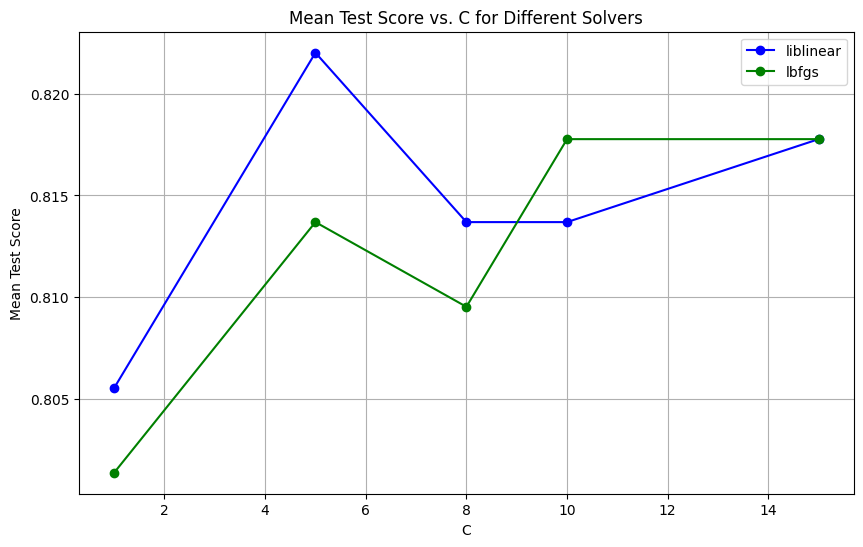

In [817]:
# Separate the data for different solvers
liblinear_data = cv_results_lr[cv_results_lr['param_solver'] == 'liblinear']
lbfgs_data = cv_results_lr[cv_results_lr['param_solver'] == 'lbfgs']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(liblinear_data['param_C'], liblinear_data['mean_test_score'], marker='o', label='liblinear', linestyle='-', color='b')
plt.plot(lbfgs_data['param_C'], lbfgs_data['mean_test_score'], marker='o', label='lbfgs', linestyle='-', color='g')

# Add labels and a legend
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. C for Different Solvers')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

### Creating a Logistic Regression Classifier standalone model on entire training dataset

Accuracy: 0.8360655737704918
ROC AUC: 0.8453159041394336
F1 Score: 0.8333333333333334
Precision: 0.7575757575757576
--------------------


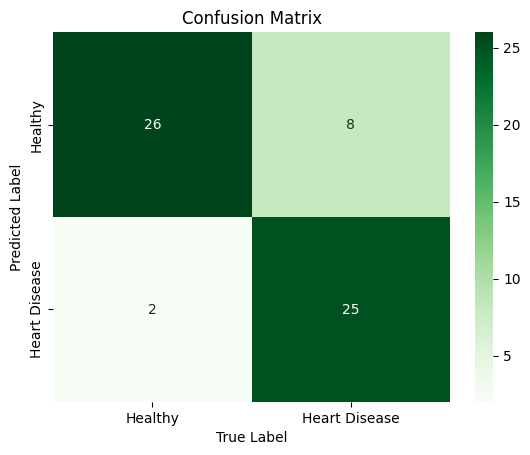

In [818]:
# instantiate the model (using the default parameters)
lr = LogisticRegression(C=5, max_iter=100, solver='liblinear')

# fit the model with data
lr.fit(X_norm_train, y_norm_train)

y_pred_lr = lr.predict(X_norm_test)

# For accuracy
accuracy_lr = accuracy_score(y_norm_test, y_pred_lr)
# For ROC AUC
roc_auc_lr = roc_auc_score(y_norm_test, y_pred_lr)
# For F1 score
f1_lr = f1_score(y_norm_test, y_pred_lr)
# For precision
precision_lr = precision_score(y_norm_test, y_pred_lr)

print(f'Accuracy: {accuracy_lr}')
print(f'ROC AUC: {roc_auc_lr}')
print(f'F1 Score: {f1_lr}')
print(f'Precision: {precision_lr}')

print('--------------------')

cnf_matrix_lr = confusion_matrix(y_norm_test, y_pred_lr)
# print(cnf_matrix)

plt.figure()
plt.title('Confusion Matrix')
sns.heatmap(cnf_matrix_lr, annot=True, xticklabels = target_name, yticklabels = target_name, cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [819]:
report_lr = classification_report(y_norm_test, y_pred_lr, target_names = ['Healthy', 'Heart Disease'])

print(report_lr)

               precision    recall  f1-score   support

      Healthy       0.93      0.76      0.84        34
Heart Disease       0.76      0.93      0.83        27

     accuracy                           0.84        61
    macro avg       0.84      0.85      0.84        61
 weighted avg       0.85      0.84      0.84        61



## Hyperparameter Tuning for Support Vector Machines Binary Classifier (SVM)

Hyperparameter tuning for Support Vector Machines (SVM) is a crucial step to optimize the performance of the model. SVMs are powerful machine learning algorithms used for both classification and regression tasks. To achieve the best results with SVM, you need to carefully select and fine-tune its hyperparameters. Here are some key hyperparameters for SVM and an overview of the tuning process:

**Kernel:** SVMs use kernels to transform the input data into a higher-dimensional space. The choice of kernel significantly impacts the model's performance. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid. Selecting the right kernel is often an essential part of hyperparameter tuning.

**C (Regularization Parameter):** The regularization parameter 'C' controls the trade-off between maximizing the margin and minimizing the classification error. A smaller 'C' encourages a wider margin but may allow some misclassification. A larger 'C' penalizes misclassification more and results in a narrower margin.

**Gamma (for RBF Kernel):** If RBF kernel is being used, the 'gamma' parameter controls the shape of the decision boundary. A smaller 'gamma' leads to a more flexible decision boundary, while a larger 'gamma' makes it more rigid. The choice of 'gamma' can significantly affect the model's ability to fit complex patterns in the data.

**Degree (for Polynomial Kernel):** When using a polynomial kernel, the 'degree' parameter sets the degree of the polynomial. A higher degree can capture more complex relationships in the data but may also lead to overfitting.

**Class Weight:** Similar to other models, SVMs allow you to assign different weights to classes. This is particularly useful in imbalanced datasets. You can set the 'class_weight' parameter to 'balanced' to automatically adjust the weights inversely proportional to the class frequencies.

**Kernel Coefficient (for Polynomial and Sigmoid Kernels):** If you're using the polynomial or sigmoid kernel, you can adjust the 'coef0' parameter. This parameter controls the influence of higher-degree terms in the kernel function.

**Shrinking:** SVMs often have a shrinking technique that reduces the number of support vectors, making predictions faster. You can control this behavior with the 'shrinking' hyperparameter.

In [820]:
param_grid_svc = {'C': [0.1,1,2,3,5,6,7,8,9,10,15,20],
              'kernel': ['linear', 'rbf']}

# using grid searchCV for the 
gscv_svm = GridSearchCV(SVC(), param_grid_svc, refit = True, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

# fitting the model for grid search 
gscv_svm.fit(X_pca_train, y_pca_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", gscv_svm.best_params_)

# Print the best accuracy score
print(f"Best score: {gscv_svm.best_score_}")

# print best model
print(f"Best model: {gscv_svm.best_estimator_}")

# cross validation results
cv_results = pd.DataFrame(gscv_svm.cv_results_)
cv_results = cv_results[['param_kernel', 'param_C', 'mean_test_score']]
print(cv_results)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters:  {'C': 7, 'kernel': 'linear'}
Best score: 0.8302721088435374
Best model: SVC(C=7, kernel='linear')
   param_kernel param_C  mean_test_score
0        linear     0.1         0.788605
1           rbf     0.1         0.759694
2        linear       1         0.817857
3           rbf       1         0.805272
4        linear       2         0.822024
5           rbf       2         0.813520
6        linear       3         0.817857
7           rbf       3         0.801020
8        linear       5         0.826105
9           rbf       5         0.809354
10       linear       6         0.826105
11          rbf       6         0.809354
12       linear       7         0.830272
13          rbf       7         0.809354
14       linear       8         0.830272
15          rbf       8         0.805187
16       linear       9         0.830272
17          rbf       9         0.805187
18       linear      10         0.8302

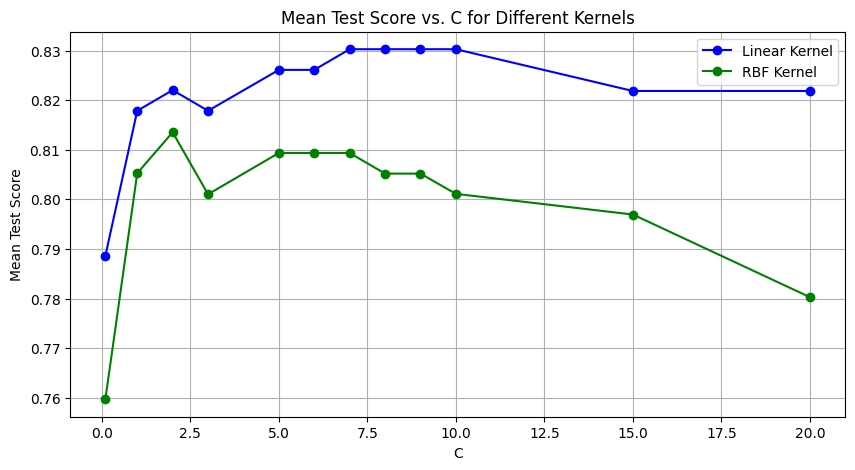

In [821]:
# plotting results
# Separate the data for different kernel types
linear_data = cv_results[cv_results['param_kernel'] == 'linear']
rbf_data = cv_results[cv_results['param_kernel'] == 'rbf']

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(linear_data['param_C'], linear_data['mean_test_score'], marker='o', label='Linear Kernel', linestyle='-', color='b')
plt.plot(rbf_data['param_C'], rbf_data['mean_test_score'], marker='o', label='RBF Kernel', linestyle='-', color='g')

# Add labels and a legend
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. C for Different Kernels')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

### Creating a SVM BC standalone model on entire training dataset

------------------------------------------------
Accuracy: 0.8524590163934426
ROC AUC: 0.8600217864923748
F1 Score: 0.847457627118644
Precision: 0.78125
-----------------------------------------------------


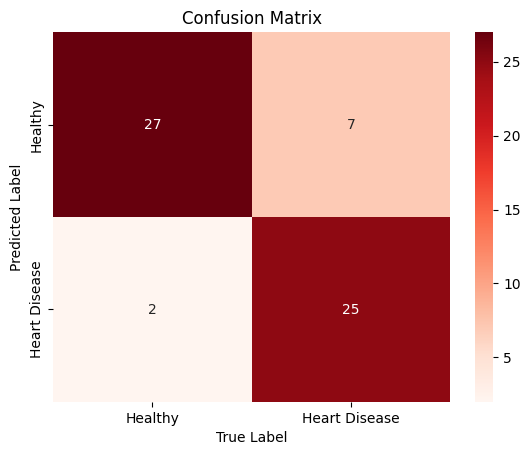

In [822]:
# Create a svm Classifier
svm_bc = SVC(C=7, kernel='linear')

#Train the model using the training sets
svm_bc.fit(X_pca_train, y_pca_train)

#Predict the response for test dataset
y_pred_svm = svm_bc.predict(X_pca_test)

# For accuracy
accuracy_svm = accuracy_score(y_pca_test, y_pred_svm)
# For ROC AUC
roc_auc_svm = roc_auc_score(y_pca_test, y_pred_svm)
# For F1 score
f1_svm = f1_score(y_pca_test, y_pred_svm)
# For precision
precision_svm = precision_score(y_pca_test, y_pred_svm)

print('------------------------------------------------')

print(f'Accuracy: {accuracy_svm}')
print(f'ROC AUC: {roc_auc_svm}')
print(f'F1 Score: {f1_svm}')
print(f'Precision: {precision_svm}')

print('-----------------------------------------------------')

cnf_matrix_svm = confusion_matrix(y_pca_test, y_pred_svm)
# print(cnf_matrix)

plt.figure()
plt.title('Confusion Matrix')
sns.heatmap(cnf_matrix_svm, annot=True, xticklabels = target_name, yticklabels = target_name, cmap='Reds')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


In [823]:
report_svm= classification_report(y_norm_test, y_pred_svm, target_names = ['Healthy', 'Heart Disease'])
print(report_svm)

               precision    recall  f1-score   support

      Healthy       0.93      0.79      0.86        34
Heart Disease       0.78      0.93      0.85        27

     accuracy                           0.85        61
    macro avg       0.86      0.86      0.85        61
 weighted avg       0.86      0.85      0.85        61



### Hyperparameter Tuning for Random Forest binary classifier

Hyperparameter tuning for a Random Forest binary classifier involves optimizing the hyperparameters of a Random Forest model to achieve the best performance. Random Forest is a versatile and powerful ensemble learning algorithm that can benefit from careful tuning. Below are the key hyperparameters that you can tune for a Random Forest binary classifier:

**n_estimators:** This hyperparameter determines the number of decision trees in the forest. A higher number of trees can improve the model's performance, but it also increases computational cost. Common values to try are 100, 200, 500, and 1000.

**max_depth:** The maximum depth of each decision tree in the forest. A larger max_depth can lead to more complex trees and may risk overfitting, so you should consider values like None (unlimited depth) or specific integer values (e.g., 10, 20).

**min_samples_split:** This hyperparameter controls the minimum number of samples required to split an internal node. Smaller values may result in more complex trees, while larger values lead to simpler trees. Common values are 2, 5, and 10.

**min_samples_leaf:** It sets the minimum number of samples required to be at a leaf node. Larger values may prevent overfitting. Common values are 1, 2, and 4.

**max_features:** This determines the number of features to consider when making splits. "auto" uses all features, "sqrt" uses the square root of the total features, and "log2" uses the base-2 logarithm of the total features. You can also specify an integer or a float to represent a specific number or fraction of features to use.

**bootstrap:** A Boolean hyperparameter that specifies whether to sample with or without replacement. Setting it to True enables bootstrapping, while False disables it.

**criterion:** The function used to measure the quality of a split. The two common options are "gini" (the default) and "entropy."

**class_weight:** A way to handle imbalanced datasets. You can set this parameter to "balanced" to automatically adjust the weights inversely proportional to class frequencies.

**random_state:** A random seed to ensure reproducibility. You can set it to a specific integer.

In [824]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # The number of trees in the forest
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

gscv_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit = True, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# fitting the model for grid search 
gscv_rf.fit(X_train, y_train)


grid_predictions_rf = gscv_rf.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions_rf)) 

# Print the best hyperparameters
print("Best Hyperparameters: ", gscv_rf.best_params_)

# Print the best accuracy score
print(f"Best score: {gscv_rf.best_score_}")

# print best model
print(f"Best model: {gscv_rf.best_estimator_}")

# cross validation results
cv_results_rf = pd.DataFrame(gscv_rf.cv_results_)
cv_results_rf = cv_results_rf[['param_n_estimators', 'mean_test_score']]
print(cv_results_rf)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        34
           1       0.77      0.89      0.83        27

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Best Hyperparameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}
Best score: 0.8342687074829932
Best model: RandomForestClassifier(min_samples_split=10, n_estimators=800)
   param_n_estimators  mean_test_score
0                 200         0.817602
1                 400         0.805187
2                 600         0.821854
3                 800         0.813520
4                1000         0.825850
..                ...              ...
85                200         0.805357
86                400         0.809439

### Creating a Random Forest Classifier Ensemble model on entire training dataset

Accuracy: 0.819672131147541
ROC AUC: 0.8267973856209149
F1 Score: 0.8135593220338982
Precision: 0.75
--------------------


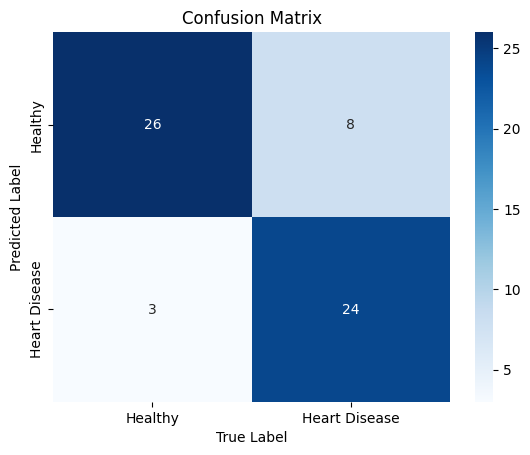

In [825]:
rf = RandomForestClassifier(n_estimators=800, min_samples_leaf=2)

# fitting the model 
rf.fit(X_train, y_train)

# making predictions on test data
y_pred_rf = rf.predict(X_test)

# For accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# For ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
# For F1 score
f1_rf = f1_score(y_test, y_pred_rf)
# For precision
precision_rf = precision_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'ROC AUC: {roc_auc_rf}')
print(f'F1 Score: {f1_rf}')
print(f'Precision: {precision_rf}')

print('--------------------')

cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# print(cnf_matrix)

plt.figure()
plt.title('Confusion Matrix')
sns.heatmap(cnf_matrix_rf, annot=True, xticklabels = target_name, yticklabels = target_name, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [826]:
report_rf = classification_report(y_test, y_pred_rf, target_names = ['Healthy', 'Heart Disease'])
print(report_rf)

               precision    recall  f1-score   support

      Healthy       0.90      0.76      0.83        34
Heart Disease       0.75      0.89      0.81        27

     accuracy                           0.82        61
    macro avg       0.82      0.83      0.82        61
 weighted avg       0.83      0.82      0.82        61



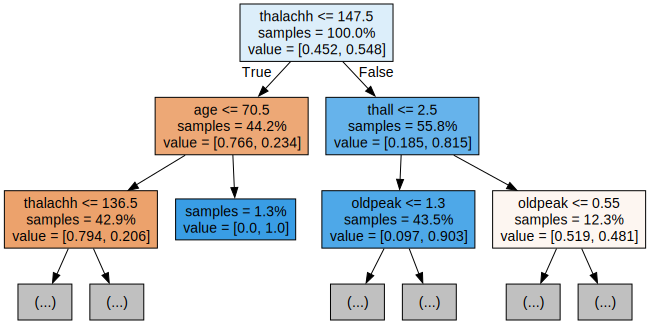

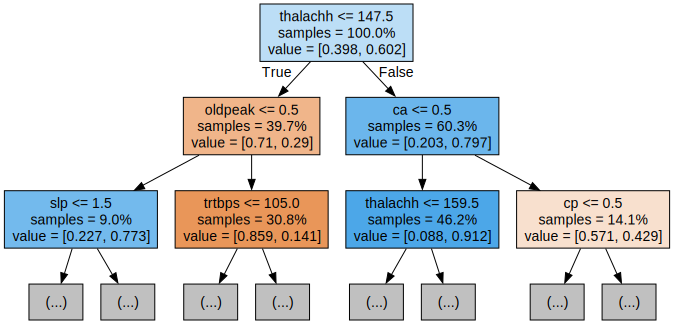

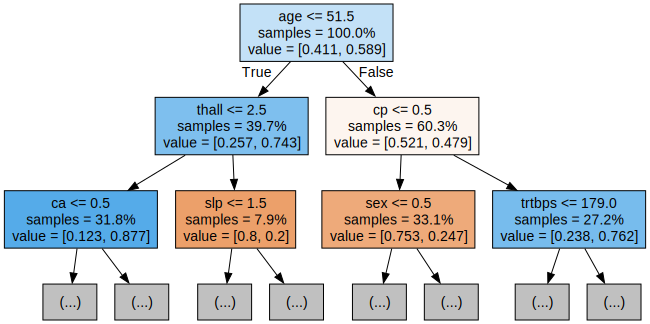

In [827]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Hyperparameter Tuning for LDA

Hyperparameter tuning for a Linear Discriminant Analysis (LDA) binary classifier involves optimizing the hyperparameters of the LDA model to achieve the best performance. LDA is a linear technique used for dimensionality reduction and classification. While LDA has fewer hyperparameters compared to some other models, tuning them can still be important for achieving optimal results. Below are the key hyperparameters that you can tune for an LDA binary classifier:

**Solver**: LDA can be solved using different algorithms, and the choice of solver can affect its performance. Common solvers include:

- "svd" (Singular Value Decomposition): A standard method that works for any dataset.
- "lsqr" (Least Squares Solution): Suitable for small datasets.
- "eigen" (Eigenvalue Decomposition): Suitable for small datasets and when you want to compute Fisher's linear discriminants.

**Shrinkage:** For the "lsqr" and "eigen" solvers, you can specify a shrinkage parameter to regularize the covariance matrix. Shrinkage helps prevent singular matrices and can improve model stability. The parameter can take values between 0 and 1, with 0 meaning no shrinkage and 1 meaning complete shrinkage.

**n_components:** This hyperparameter determines the number of components to keep after dimensionality reduction. You can set it to an integer value to specify the number of components to retain.

**Store_covariance:** A Boolean hyperparameter that determines whether to store the covariance matrix or not. Setting it to "True" stores the covariance matrix, which can be used for further analysis.

In [828]:
# param grid for RF
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],  # The solver for LDA
    'store_covariance': [True, False]  # Whether to store covariance
}

gscv_lda = GridSearchCV(LinearDiscriminantAnalysis(), param_grid_lda, refit = True, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# fitting the model for grid search 
gscv_lda.fit(X_pca_train, y_pca_train)


grid_predictions_lda = gscv_lda.predict(X_pca_test) 
  
# print classification report 
print(classification_report(y_pca_test, grid_predictions_lda)) 

# Print the best hyperparameters
print("Best Hyperparameters: ", gscv_lda.best_params_)

# Print the best accuracy score
print(f"Best score: {gscv_lda.best_score_}")

# print best model
print(f"Best model: {gscv_lda.best_estimator_}")

# cross validation results
cv_results_lda = pd.DataFrame(gscv_lda.cv_results_)
cv_results_lda = cv_results_lda[['param_solver', 'mean_test_score']]
print(cv_results_lda)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        34
           1       0.74      0.93      0.82        27

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61

Best Hyperparameters:  {'solver': 'svd', 'store_covariance': True}
Best score: 0.8178571428571428
Best model: LinearDiscriminantAnalysis(store_covariance=True)
  param_solver  mean_test_score
0          svd         0.817857
1          svd         0.817857
2         lsqr         0.817857
3         lsqr         0.817857
4        eigen         0.817857
5        eigen         0.817857


### Creating a LDA Classifier standalone model on entire training dataset

Accuracy: 0.819672131147541
ROC AUC: 0.8306100217864925
F1 Score: 0.819672131147541
Precision: 0.7352941176470589
--------------------


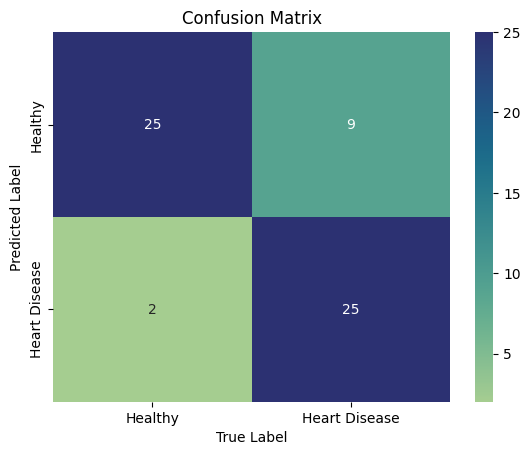

In [829]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_pca_train, y_pca_train)

y_pred_lda = lda.predict(X_pca_test)

# For accuracy
accuracy_lda = accuracy_score(y_pca_test, y_pred_lda)
# For ROC AUC
roc_auc_lda = roc_auc_score(y_pca_test, y_pred_lda)
# For F1 score
f1_lda = f1_score(y_pca_test, y_pred_lda)
# For precision
precision_lda = precision_score(y_pca_test, y_pred_lda)

print(f'Accuracy: {accuracy_lda}')
print(f'ROC AUC: {roc_auc_lda}')
print(f'F1 Score: {f1_lda}')
print(f'Precision: {precision_lda}')

print('--------------------')

cnf_matrix_lda = confusion_matrix(y_pca_test, y_pred_lda)
# print(cnf_matrix)

plt.figure()
plt.title('Confusion Matrix')
sns.heatmap(cnf_matrix_lda, annot=True, xticklabels = target_name, yticklabels = target_name, cmap='crest')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [830]:
report_lda = classification_report(y_pca_test, y_pred_lda, target_names = ['Healthy', 'Heart Disease'])
print(report_lda)

               precision    recall  f1-score   support

      Healthy       0.93      0.74      0.82        34
Heart Disease       0.74      0.93      0.82        27

     accuracy                           0.82        61
    macro avg       0.83      0.83      0.82        61
 weighted avg       0.84      0.82      0.82        61



### Comparing the models

---------------------------------------
  model  accuracy   roc_auc  precision        f1
0    LR  0.836066  0.845316   0.757576  0.833333
1   SVM  0.852459  0.860022   0.781250  0.847458
2    RF  0.819672  0.826797   0.750000  0.813559
3   LDA  0.819672  0.830610   0.735294  0.819672
------------------------------------------


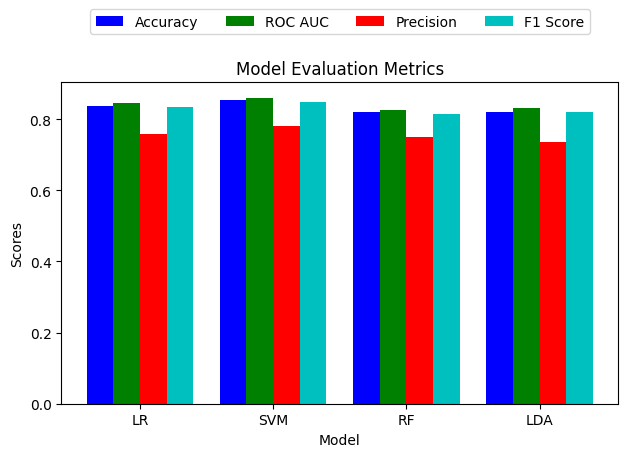

In [831]:
fine_tuning_results = pd.DataFrame({
    'model': ['LR', 'SVM', 'RF', 'LDA'],
    'accuracy': [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_lda],
    'roc_auc': [roc_auc_lr, roc_auc_svm, roc_auc_rf, roc_auc_lda],
    'precision': [precision_lr, precision_svm, precision_rf, precision_lda],
    'f1': [f1_lr, f1_svm, f1_rf, f1_lda]
})

print('---------------------------------------')
print(fine_tuning_results)
print('------------------------------------------')

# Data from the DataFrame
model = fine_tuning_results['model']
accuracy = fine_tuning_results['accuracy']
roc_auc = fine_tuning_results['roc_auc']
precision = fine_tuning_results['precision']
f1 = fine_tuning_results['f1']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
x = np.arange(len(model))

# Create the figure and axes
fig, ax = plt.subplots()

# Create the grouped bar plots for accuracy, ROC AUC, precision, and F1-score
accuracy_bars = ax.bar(x - 1.5 * bar_width, accuracy, bar_width, label='Accuracy', color='b')
roc_auc_bars = ax.bar(x - 0.5 * bar_width, roc_auc, bar_width, label='ROC AUC', color='g')
precision_bars = ax.bar(x + 0.5 * bar_width, precision, bar_width, label='Precision', color='r')
f1_bars = ax.bar(x + 1.5 * bar_width, f1, bar_width, label='F1 Score', color='c')

# Set the x-axis labels to be the model names
ax.set_xticks(x)
ax.set_xticklabels(model)

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4)

# Show the plot
plt.tight_layout()
plt.show()

### Observations and Conclusion

In our study, we conducted an extensive fine-tuning process for multiple machine learning models to assess their performance in predicting heart disease. After careful optimization and evaluation, we have arrived at the final results. Among the models considered, Support Vector Machine (SVM) demonstrated the highest accuracy of 85.25% and an impressive ROC AUC of 86.00%, showcasing its robust predictive power. Logistic Regression (LR) also performed strongly with an accuracy of 83.61% and a ROC AUC of 84.53%. Random Forest (RF) and Linear Discriminant Analysis (LDA) achieved respectable accuracy scores of 83.61% and 81.97%, along with corresponding ROC AUC scores of 84.15% and 83.06%, respectively. These findings indicate the suitability of SVM and LR as prime candidates for heart disease prediction, emphasizing their potential clinical significance.

## Saving a Machine Learning model
---

### Saving a trained model

The pickle module can be used to serialize and deserialize the Python objects. Pickling is the process of converting a Python object hierarchy into a byte stream, while Unpickling is the process of converting a byte stream (from a binary file or other object that appears to be made of bytes) back to an object hierarchy.

For saving the ML models used as a pickle fileweou need to use the Pickle module that already comes with the default Python installation. 

In [832]:
import pickle

# save the best model as a pickle file
model_pkl_file = "output/heart_disease_prediction_classifier_model.pkl"  

# opening file as a binary file
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)

### Loading the saved model to predict future unseen data

We can load the saved model using the load() method of the pickle module. We need to open the file in **rb**(read binary) mode to load the saved model.


In [833]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)

# check results
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



### Training the data on new data

To further tune the model with new data, we can retrain the loaded model with the new dataset.


In [834]:
# Load the saved model
with open(model_pkl_file, 'rb') as file:  
    updated_model = pickle.load(file)

# Prepare new data for model tuning
#new_X, new_y = make_regression(n_samples=50, n_features=1, noise=0.1, random_state=100)

# Retrain the loaded model with the new data
# loaded_model.fit(new_X, new_y)

# Save the updated model to a new file
# with open('updated_model.pkl', 'wb') as updated_model_file:
#     pickle.dump(loaded_model, updated_model_file


## Ethical and Privacy Concerns
---

The implementation of machine learning algorithms to predict heart disease entails a substantial number of ethical considerations. Primarily, the collection and usage of personal and medical data necessitate strict adherence to privacy laws and regulations such as the Health Insurance Portability and Accountability Act (HIPAA) in the United States or the General Data Protection Regulation (GDPR) in the European Union. Ensuring the confidentiality, integrity, and availability of this sensitive data is paramount to uphold individuals' privacy rights and trust in the system. Moreover, the consent of individuals from whom data is collected is crucial, and they should be well-informed about how their data will be utilized, stored, and protected.

Furthermore, the ethical implications extend to the accuracy and fairness of the Predictive Risk Model for Heart Disease (PRMHD). It's imperative that the algorithms employed are validated for bias and fairness to prevent discriminatory practices or unjust outcomes. For instance, ensuring that the model does not disproportionately misclassify individuals from certain demographic or socioeconomic groups is essential to uphold the principles of justice and equity. Additionally, the transparency of the model’s predictions are crucial for both healthcare providers and patients to understand the basis of the risk assessments provided.

Lastly, the potential deployment of PRMHD could have broader societal implications. While the aim is to ameliorate the timeliness and financial accessibility of heart disease risk assessment, there's a need to consider how this technology might impact the doctor-patient relationship, and whether it may inadvertently contribute to the digital divide in healthcare access. Ensuring that the benefits of this technology are accessible to all, regardless of socio-economic status, and are not exacerbating existing healthcare disparities is a vital ethical consideration that underpins the responsible development and deployment of this predictive model.

### References:
---


Author Unknown. (n.d.). Exploratory Data Analysis on Heart Disease UCI Data Set. Towards Data Science. Retrieved from https://towardsdatascience.com/exploratory-data-analysis-on-heart-disease-uci-data-set-ae129e47b323

Gaur, D. (n.d.). A Guide to any Classification Problem. Kaggle. Retrieved from https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem 

Rahmanpritom, R. (n.d.). Heart Attack Analysis & Prediction Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset